Датасет взят с https://www.kaggle.com/datasets/atharvaarya25/financials/data

In [30]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Financials.csv')

In [32]:
df.shape

(700, 16)

In [33]:
df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [34]:
df.head(1)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014


Приведем названия колонок в удобный вид.

In [35]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

Проверим на наличие пропусков и дубликатов

In [36]:
print(df.isna().any())
print('*********************')
print(df.duplicated().any())

segment                False
country                False
product                False
discount_band          False
units_sold             False
manufacturing_price    False
sale_price             False
gross_sales            False
discounts              False
sales                  False
cogs                   False
profit                 False
date                   False
month_number           False
month_name             False
year                   False
dtype: bool
*********************
False


In [37]:
df.nunique()

segment                  5
country                  5
product                  6
discount_band            4
units_sold             510
manufacturing_price      6
sale_price               7
gross_sales            550
discounts              515
sales                  559
cogs                   545
profit                 557
date                    16
month_number            12
month_name              12
year                     2
dtype: int64

In [38]:
df.columns.to_list()

['segment',
 'country',
 'product',
 'discount_band',
 'units_sold',
 'manufacturing_price',
 'sale_price',
 'gross_sales',
 'discounts',
 'sales',
 'cogs',
 'profit',
 'date',
 'month_number',
 'month_name',
 'year']

Очищаем данные от ненужных символов и приводим данные к нужным форматам.

In [39]:
columns_to_clean = ['units_sold',
                    'manufacturing_price',
                    'sale_price',
                    'gross_sales',
                    'discounts',
                    'sales',
                    'cogs',
                    'profit']

df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.replace('[$,)(]', '', regex=True).str.strip().str.replace('-', '0'))

In [40]:
df[columns_to_clean] = df[columns_to_clean].astype(float)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year_month'] = df.date.dt.strftime('%Y-%m')
df.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year,year_month
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,2014-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,2014-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014,2014-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014,2014-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014,2014-06


 Используем метод `applymap` чтобы избавиться от лишних пробелов по всему датафрейму.

In [41]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [42]:
df.head(3)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year,year_month
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,2014-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,2014-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014,2014-06


### Проведем небольшую предварительную визуализацию.

<Axes: xlabel='product', ylabel='units_sold'>

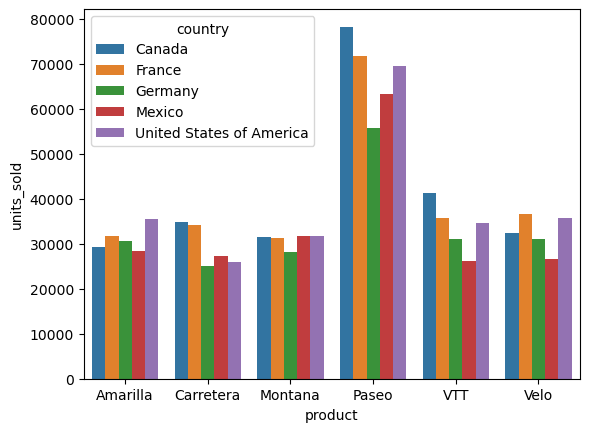

In [43]:
product_sold_by_country = df.groupby(['country', 'product'], as_index=False).units_sold.sum()
sns.barplot(x = 'product', y = 'units_sold', data = product_sold_by_country, errorbar=None, hue='country')

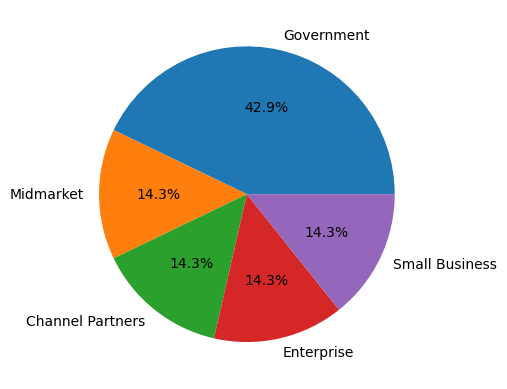

In [44]:
segment_representation = df.segment.value_counts()
plt.pie(segment_representation.values, labels = segment_representation.index, autopct='%1.1f%%')
plt.show()

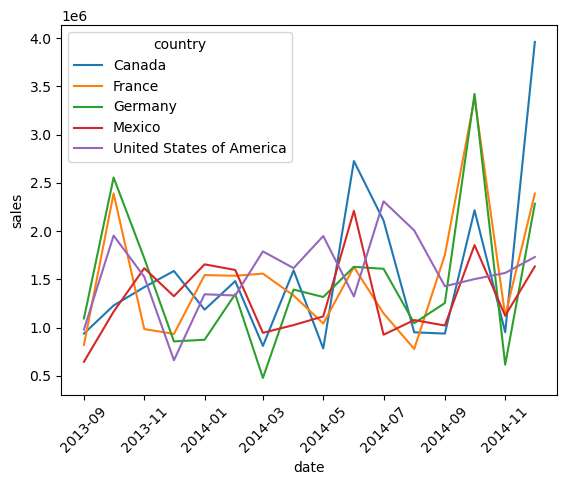

In [45]:
sales_df = df.groupby(['date', 'country'], as_index=False).sales.sum()
sns.lineplot(x='date', y='sales', data = sales_df, hue = 'country')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.groupby('segment').sales.mean()

segment
Channel Partners     18005.936400
Enterprise          196116.943800
Government          175014.202267
Midmarket            23818.830900
Small Business      424279.185000
Name: sales, dtype: float64

In [47]:
df.groupby('segment').profit.mean()

segment
Channel Partners    13168.031400
Enterprise           9400.968800
Government          37960.577267
Midmarket            6601.030900
Small Business      41431.685000
Name: profit, dtype: float64

<Axes: >

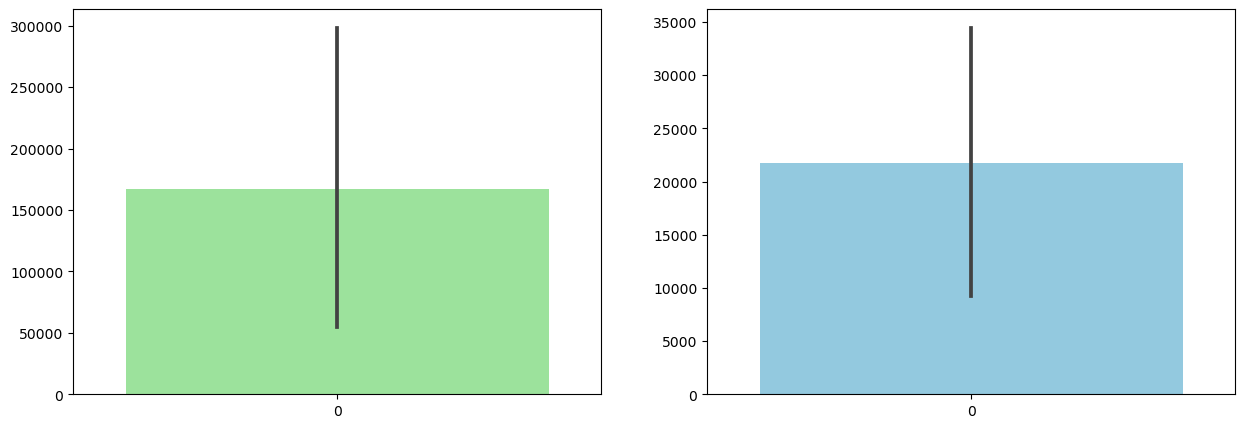

In [48]:
fig,axes = plt.subplots(1,2, figsize=(15, 5))

sns.barplot(df.groupby('segment').sales.mean(), ax=axes[0], color='lightgreen')
sns.barplot(df.groupby('segment').profit.mean(), ax=axes[1], color='skyblue')

### Сохраним очищенный датафрейм для дальнейшей работы с визуализацией в Google Looker Studio.

In [49]:
df.to_csv('financials_clean.csv', index=False)